# Analysis of PSSM results
After running the psiblast on the input fasta-file. The difference between the WT amino acid and substitutions observed during the evolution is computed. 
Again, G and P are removed as potential substitutions from the WT sequence and mutations to G and C as well. 
A cutoff is computed as being significant using the mean of the difference score with 2 standard deviations. 

In [1]:
import pandas as pd
import seaborn as sns

In [ ]:
STD_DEV = 1

In [2]:
date = "20181204"

In [3]:
df_ = pd.read_csv("ascii_mtx_file",skiprows=2,skip_blank_lines=True,  delim_whitespace=True,header=0,
                  names=["WT",u'A', u'R', u'N', u'D', u'C', u'Q', u'E', u'G', u'H', u'I', u'L', u'K',
       u'M', u'F', u'P', u'S', u'T', u'W', u'Y', u'V', u'A.1', u'R.1', u'N.1',
       u'D.1', u'C.1', u'Q.1', u'E.1', u'G.1', u'H.1', u'I.1', u'L.1', u'K.1',
       u'M.1', u'F.1', u'P.1', u'S.1', u'T.1', u'W.1', u'Y.1', u'V.1',"S1","S2"]) # ,nrows=234)

In [4]:
df_ = df_.dropna()
df_ = df_[df_["WT"] != '*']

In [5]:
df_["WT_score"] = 0.0
for index, row in df_.iterrows():
    df_.loc[index,"WT_score"] = df_.loc[index,df_.loc[index,"WT"]]

In [6]:
df_.head()
cols = [u'WT',u'A',u'R',        u'N',        u'D',
              u'C',        u'Q',        u'E',        u'G',        u'H',
              u'I',        u'L',        u'K',        u'M',        u'F',
              u'P',        u'S',        u'T',        u'W',        u'Y',
              u'V',     u'WT_score']
df_ = df_[cols]
df_.WT_score = df_.WT_score.astype(int)
df_.head()

,WT,A,R,N,D,C,Q,E,G,H,...,K,M,F,P,S,T,W,Y,V,WT_score
1,M,-4.0,-5.0,-6.0,-7.0,-5.0,-4.0,-6.0,-6.0,-5.0,...,-5.0,11.0,-3.0,-6.0,-5.0,-4.0,-5.0,-5.0,-3.0,11
2,E,3.0,-2.0,-1.0,-2.0,-4.0,0.0,3.0,2.0,3.0,...,-1.0,-2.0,-4.0,-3.0,2.0,-1.0,-5.0,-3.0,-3.0,3
3,K,0.0,1.0,0.0,-3.0,-4.0,1.0,-2.0,-3.0,-3.0,...,3.0,-3.0,-4.0,-2.0,5.0,2.0,-5.0,-4.0,-3.0,3
4,T,-2.0,-3.0,-2.0,-4.0,-3.0,-3.0,-3.0,-4.0,-4.0,...,-3.0,1.0,3.0,-3.0,3.0,3.0,-4.0,-2.0,-1.0,3
5,D,0.0,-3.0,1.0,1.0,-4.0,1.0,3.0,-4.0,0.0,...,-1.0,-3.0,-5.0,1.0,3.0,3.0,-5.0,-4.0,-2.0,1


In [7]:
# WT, Pos, AA, WT_score, AA_score, Diff_score
dffs = []
for index,row in df_.iterrows():
    for j in range(len(row)):
        if(j == 0):
            continue
        elif(df_.columns[j] == "WT_score"):
            continue
        elif(df_.columns[j] ==  df_.loc[index,"WT"] ):
            continue
        elif( row[j] > df_.loc[index,"WT_score"]):
            val_ = str( abs( df_.loc[index,"WT_score"] - row[j]  ) )
            tmp_ = df_.loc[index,"WT"]+","+str(index)+","+df_.columns[j]+","+str(df_.loc[index,"WT_score"])+","+str(row[j])+","+val_
            dffs.append(tmp_)

In [8]:
with open(str(date)+"_stabilization_phylogenic.csv",'w') as f:
    f.write("WT,Pos,AA,WT_score,AA_score,Diff_score\n")
    for line in dffs:
        f.write(line+"\n")
df_.to_excel(str(date)+"_PSSM_analysis.xlsx")

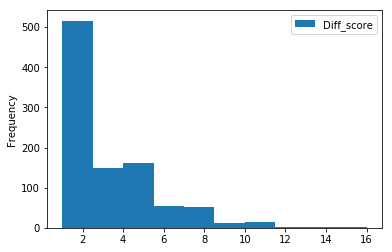

In [10]:
df_pssm_result = pd.read_csv(str(date)+"_stabilization_phylogenic.csv")
df_pssm_result.plot(y="Diff_score",kind='hist')

In [11]:
# remove all G,P,C -> X
df_pssm_result = df_pssm_result[(df_pssm_result["WT"] != 'G') & (df_pssm_result["WT"] != 'P') & \
                               (df_pssm_result["AA"] != 'G') & (df_pssm_result["AA"] != 'C')]

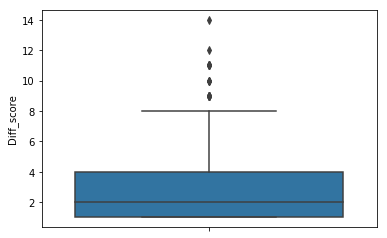

In [12]:
# get median of values
sns.boxplot(y="Diff_score",data=df_pssm_result)

In [13]:
df_pssm_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 963
Data columns (total 6 columns):
WT            804 non-null object
Pos           804 non-null int64
AA            804 non-null object
WT_score      804 non-null int64
AA_score      804 non-null float64
Diff_score    804 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 44.0+ KB


In [14]:
cutoff = df_pssm_result["Diff_score"].mean()+STD_DEV*df_pssm_result["Diff_score"].std()

In [15]:
df_pssm_result = df_pssm_result[df_pssm_result["Diff_score"] > cutoff]
df_pssm_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 13 to 926
Data columns (total 6 columns):
WT            35 non-null object
Pos           35 non-null int64
AA            35 non-null object
WT_score      35 non-null int64
AA_score      35 non-null float64
Diff_score    35 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.9+ KB


In [16]:
print("Unique positions: ",len(df_pssm_result["Pos"].unique()) )

Unique positions:  32


In [1]:
print("Number of amino acid substitutions: ",len(df_pssm_result.index ))

NameError: name 'df_pssm_result' is not defined

In [17]:
# write to muts.txt
with open("muts.txt", 'w') as f:
    for i,j,k in zip(df_pssm_result.WT, df_pssm_result.Pos,df_pssm_result.AA):
        f.write(i+str(j)+k+'\n')

In [1]:
!python /Users/pgreisen/pythonscripts/develop/convert_pssm_to_csv/convert_pssm_to_csv.py ascii_mtx_file

ascii_mtx_file            convert_pssm_to_csv.py    test.csv
convert_pssm_to_csv.ipynb pssm.csv
